In [20]:
import pandas as pd


df = pd.read_csv("IMDB Dataset.csv")

In [21]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [22]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


## Removing duplicates

In [23]:
df_unique = df.drop_duplicates()
df_unique.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,No one expects the Star Trek movies to be high...,positive
freq,1,24884


## TF-IDF test

In [24]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
count = CountVectorizer()
doc = np.array([
    'The food is great.',
    'Staff behaviour is great.',
    'Ambience can be better.',
    'Cuisine varieties are great.'
])

bag = count.fit_transform(doc)

In [27]:
print(count.vocabulary_)
bag.toarray()

{'the': 11, 'food': 7, 'is': 9, 'great': 8, 'staff': 10, 'behaviour': 3, 'ambience': 0, 'can': 5, 'be': 2, 'better': 4, 'cuisine': 6, 'varieties': 12, 'are': 1}


array([[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1]])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(doc)

# Convert to readable DataFrame
import pandas as pd
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

print(tfidf_df)

   ambience       are   be  behaviour  better  can   cuisine     food  \
0       0.0  0.000000  0.0    0.00000     0.0  0.0  0.000000  0.57458   
1       0.0  0.000000  0.0    0.57458     0.0  0.0  0.000000  0.00000   
2       0.5  0.000000  0.5    0.00000     0.5  0.5  0.000000  0.00000   
3       0.0  0.541736  0.0    0.00000     0.0  0.0  0.541736  0.00000   

      great        is    staff      the  varieties  
0  0.366747  0.453005  0.00000  0.57458   0.000000  
1  0.366747  0.453005  0.57458  0.00000   0.000000  
2  0.000000  0.000000  0.00000  0.00000   0.000000  
3  0.345783  0.000000  0.00000  0.00000   0.541736  


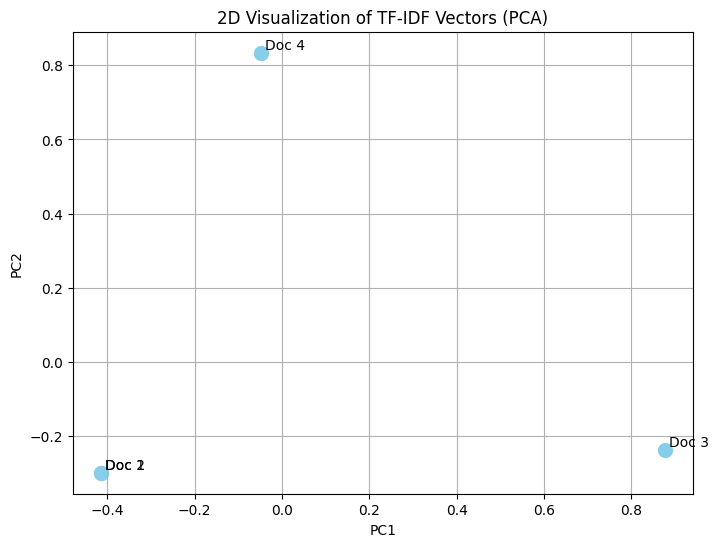

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

doc = np.array([
    'The food is great.',
    'Staff behaviour is great.',
    'Ambience can be better.',
    'Cuisine varieties are great.'
])

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(doc)

pca = PCA(n_components=2) # to visualise reduce dims
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='skyblue', s=100)

for i, txt in enumerate(doc):
    plt.annotate(f'Doc {i+1}', (X_pca[i, 0]+0.01, X_pca[i, 1]+0.01), fontsize=10)

plt.title("2D Visualization of TF-IDF Vectors (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


## Actual sentiment analysis on IMDB

In [10]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk


In [4]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [6]:
import pandas as pd

df = pd.read_csv('IMDB Dataset.csv')

In [7]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0}) #converting sentiments to 1 and 0

In [9]:
import re

def clean_text(text):
    text = re.sub(r'<.*?>', '', text) # remove HTML
    text = re.sub(r'[^a-zA-Z]', ' ', text) # remove numbers/symbols
    tokens = nltk.word_tokenize(text.lower())
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens if word not in stop_words])

In [11]:
df['clean_review'] = df['review'].apply(clean_text)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer



tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['clean_review'])
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['sentiment'], test_size=0.2, random_state=42)


In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)


In [20]:
print(" TF-IDF + Logistic Regression")
print("Accuracy:", accuracy_score(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))

 TF-IDF + Logistic Regression
Accuracy: 0.8891
Confusion Matrix:
 [[4335  626]
 [ 483 4556]]


### Increasing max no of features from 5000 -> 8000

In [21]:
tfidf = TfidfVectorizer(max_features=8000) #5000->8000
X_tfidf = tfidf.fit_transform(df['clean_review'])
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['sentiment'], test_size=0.2, random_state=42)

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)


print(" TF-IDF + Logistic Regression")
print("Accuracy:", accuracy_score(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))

 TF-IDF + Logistic Regression
Accuracy: 0.8922
Confusion Matrix:
 [[4350  611]
 [ 467 4572]]


As we can see, misclassification is lower